# Вычисления к работе 1.3.3
### Удовин Илья, 874

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

def create_plot(s1, s2):
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linewidth=0.2)
    plt.xlabel(s1)
    plt.ylabel(s2)

In [2]:
d1 = pd.read_csv('l50.csv', header=0, sep=';')
display(d1)
d1 = np.transpose(np.array(d1, dtype=float))
d1[1] *= .001
d1[2] *= 9.8 * .2
print(d1, '\n')

d2 = pd.read_csv('p_l.csv', header=0, sep=';')
display(d2)
d2 = np.transpose(np.array(d2, dtype=float))
d2[0] *= .01
d2[1] *= 9.8 * .2
print(d2, '\n')

d3 = pd.read_csv('q_p.csv', header=0, sep=';')
display(d3)
d3 = np.transpose(np.array(d3, dtype=float))
d3[0] *= 9.8 * .2 
d3[2] *= .001
print(d3)

,"t, с","V, дел","P, дел"
0,71.5,2,22
1,35.4,2,47
2,48.4,2,35
3,52.3,4,67
4,88.8,1,10
5,61.7,5,73
6,61.9,3,40
7,54.4,5,94
8,65.7,10,279
9,69.9,10,246


[[7.1500e+01 3.5400e+01 4.8400e+01 5.2300e+01 8.8800e+01 6.1700e+01
  6.1900e+01 5.4400e+01 6.5700e+01 6.9900e+01 7.3300e+01 7.9300e+01
  6.8900e+01 7.5800e+01]
 [2.0000e-03 2.0000e-03 2.0000e-03 4.0000e-03 1.0000e-03 5.0000e-03
  3.0000e-03 5.0000e-03 1.0000e-02 1.0000e-02 1.0000e-02 1.0000e-02
  8.0000e-03 8.0000e-03]
 [4.3120e+01 9.2120e+01 6.8600e+01 1.3132e+02 1.9600e+01 1.4308e+02
  7.8400e+01 1.8424e+02 5.4684e+02 4.8216e+02 4.4100e+02 3.7632e+02
  3.1752e+02 2.5284e+02]] 



,"l, см","P, дел"
0,131,224
1,81,157
2,41,103
3,11,59


[[1.3100e+00 8.1000e-01 4.1000e-01 1.1000e-01]
 [4.3904e+02 3.0772e+02 2.0188e+02 1.1564e+02]] 



,"P, дел","t, с","V, л"
0,184,56.0,15
1,168,39.6,10
2,144,55.5,13
3,120,48.1,10
4,109,55.1,11
5,95,38.1,7
6,80,41.4,7
7,61,40.4,6
8,45,37.2,5
9,30,35.4,4


[[3.6064e+02 3.2928e+02 2.8224e+02 2.3520e+02 2.1364e+02 1.8620e+02
  1.5680e+02 1.1956e+02 8.8200e+01 5.8800e+01 3.9200e+01 1.9600e+01]
 [5.6000e+01 3.9600e+01 5.5500e+01 4.8100e+01 5.5100e+01 3.8100e+01
  4.1400e+01 4.0400e+01 3.7200e+01 3.5400e+01 5.4100e+01 5.5500e+01]
 [1.5000e-02 1.0000e-02 1.3000e-02 1.0000e-02 1.1000e-02 7.0000e-03
  7.0000e-03 6.0000e-03 5.0000e-03 4.0000e-03 4.0000e-03 2.0000e-03]]


## Получим зависимость $\Delta P$ от $Q$ для трубки диаметром $d = 4 \ \text{мм}$.

<IPython.core.display.Javascript object>


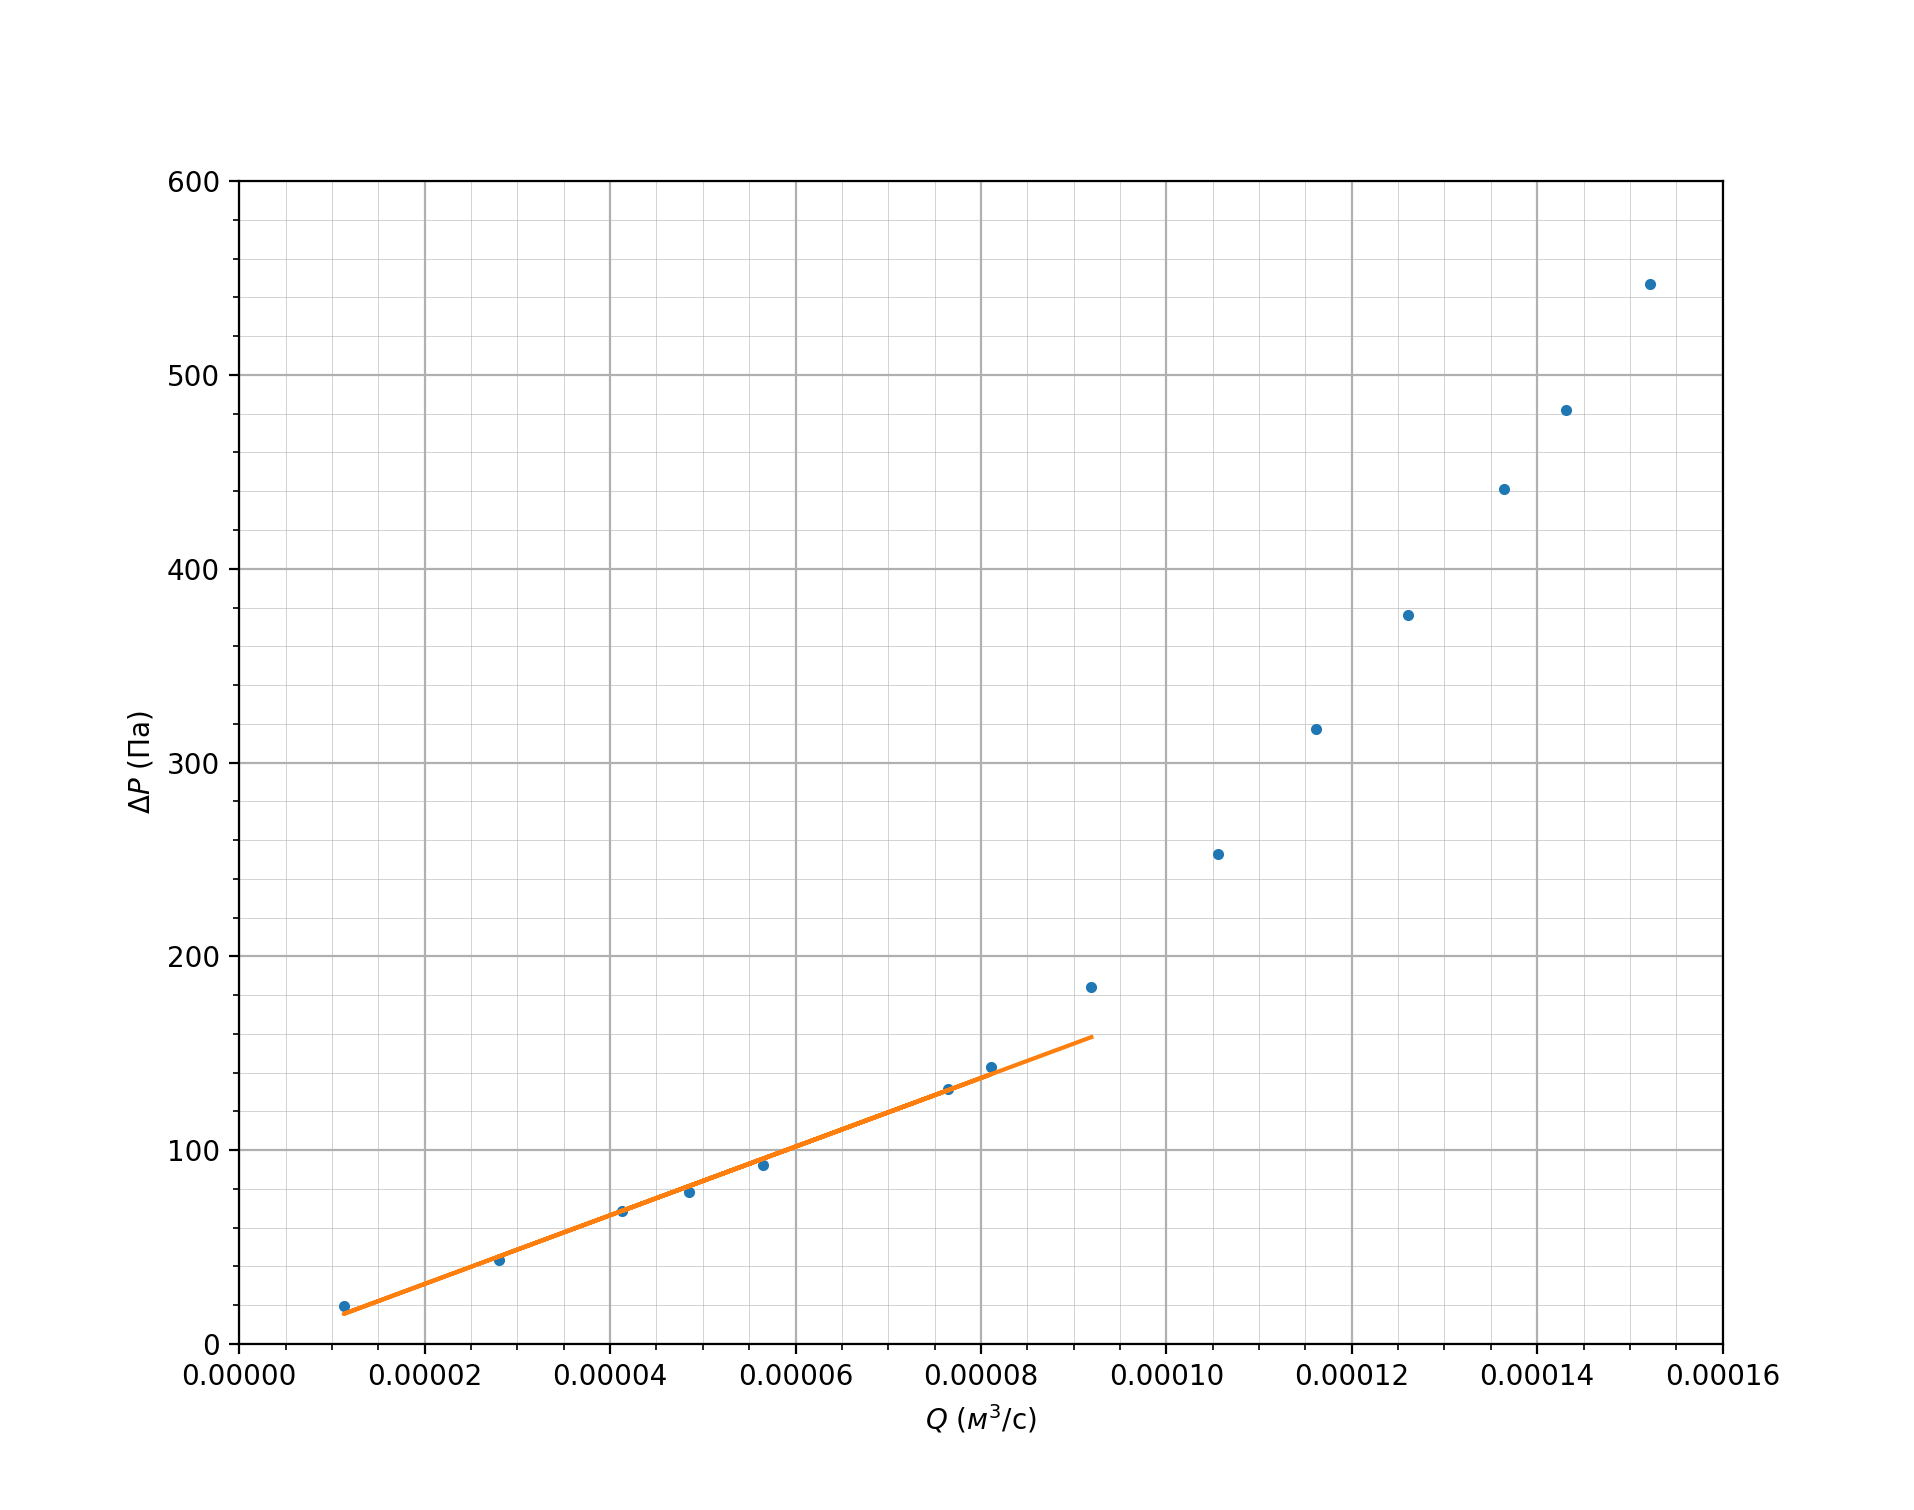

[ 1.77107225e+06 -4.47194140e+00]


In [3]:
create_plot('$Q$ ($м^3$/с)', '$\Delta P$ (Па)')
plt.xlim(0, .00016)
plt.ylim(0, 600)
plt.plot(d1[1] / d1[0], d1[2], linestyle='', marker='.')

f = lambda x, a, b: a * x + b

xdata = d1[1][:7] / d1[0][:7]
ydata = d1[2][:7]
eta_opt, eta_cov = curve_fit(f, xdata, ydata)
print(eta_opt)
xdata = d1[1][:8] / d1[0][:8]
plt.plot(xdata, f(xdata, *eta_opt))

## Определим $\eta$ и вычислим $Re$.

In [4]:
l = 0.5
r = 2e-3
eta = eta_opt[0] * math.pi * r ** 4 / (8 * l)
eta

2.2255950283697516e-05

$$Re = \frac{Qr\rho}{S\eta}$$

In [5]:
Q = 8.8e-5
rho = 1.3
S = math.pi * r ** 2
Re = (Q * r * rho) / (S * eta)
Re

818.0879835560063

## Построим график распределения давления вдоль трубки.

<IPython.core.display.Javascript object>


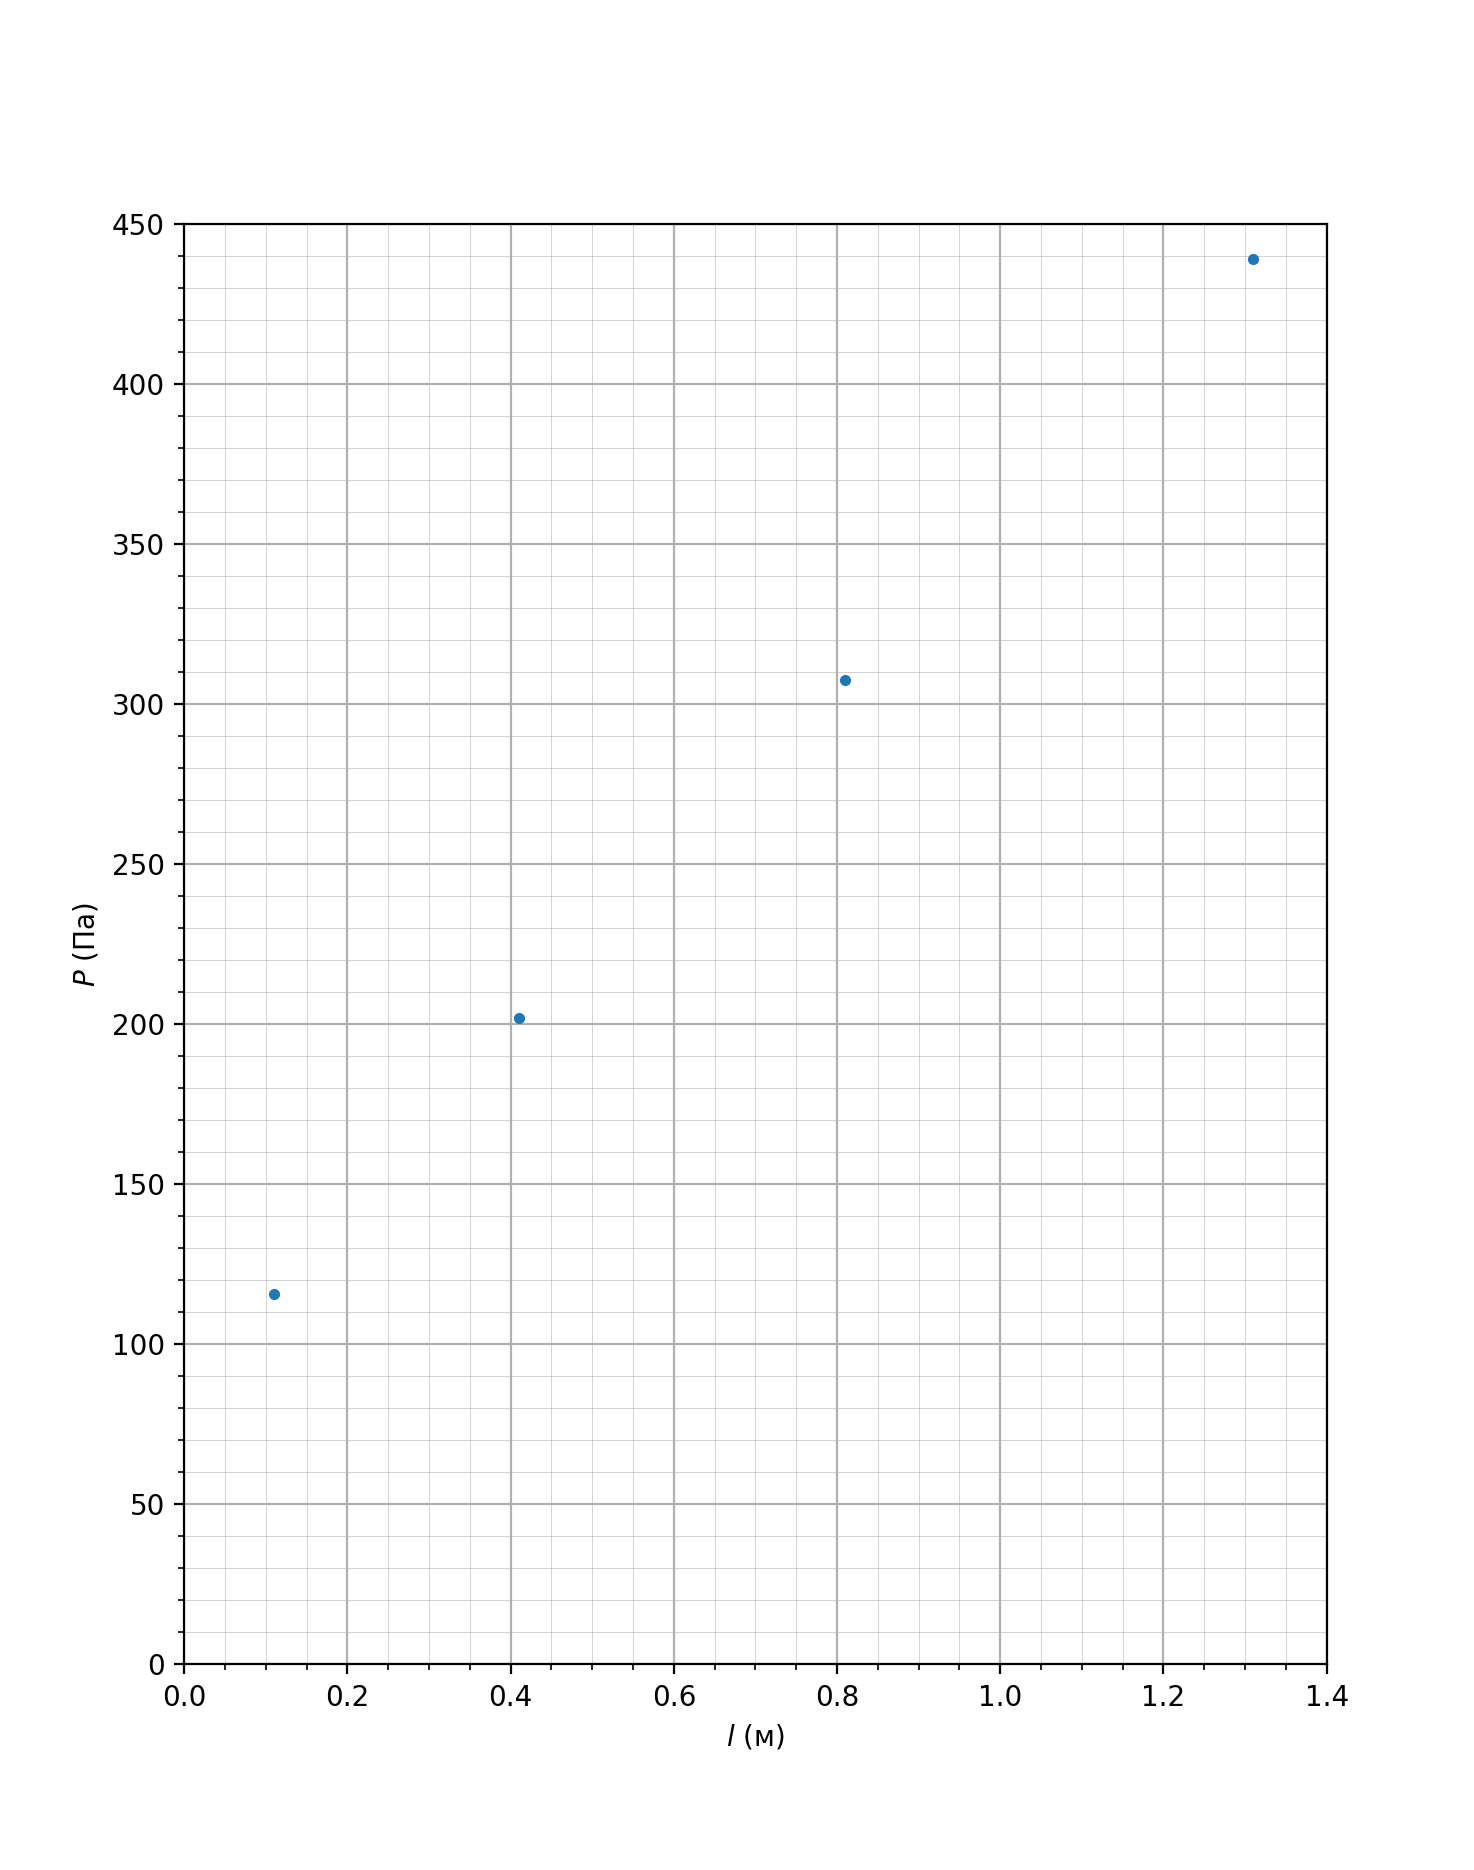

In [6]:
create_plot('$l$ (м)', '$P$ (Па)')
plt.xlim(0, 1.4)
plt.ylim(0, 450)
plt.plot(d2[0], d2[1], linestyle='', marker='.')

## Получим зависимость $\Delta P$ от $Q$ для другой трубки.

<IPython.core.display.Javascript object>


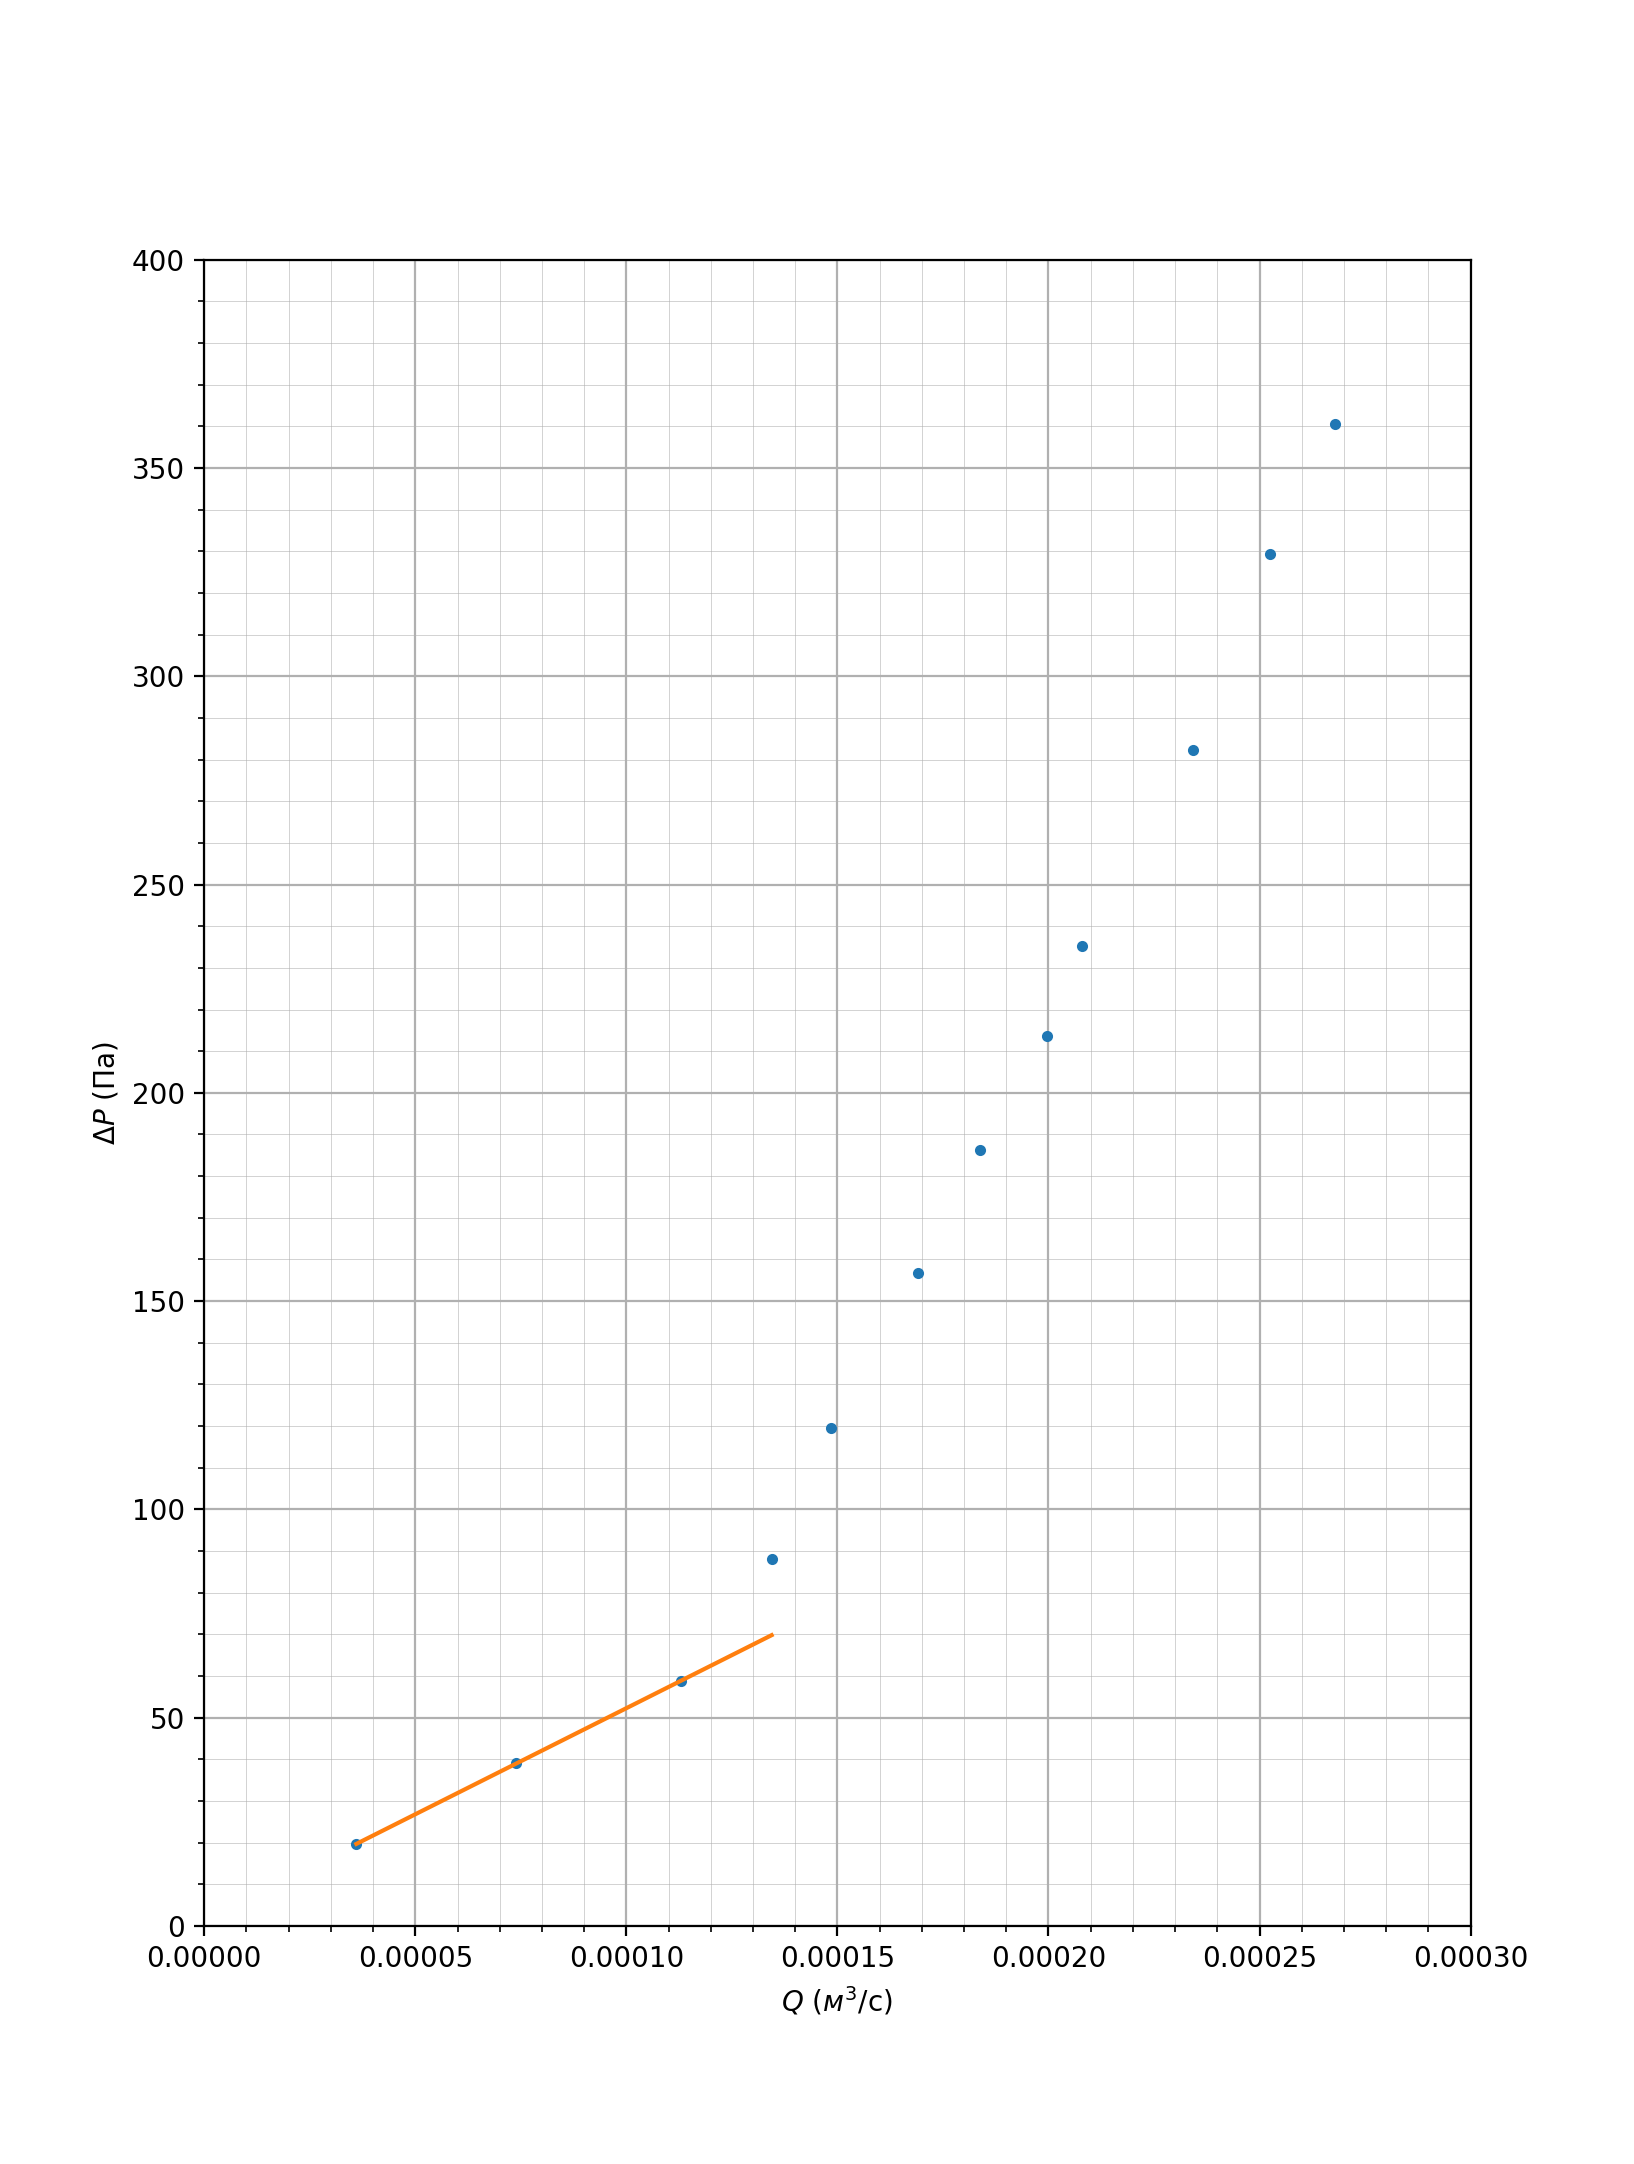

[5.09328354e+05 1.34543666e+00]


In [7]:
create_plot('$Q$ ($м^3$/с)', '$\Delta P$ (Па)')
plt.xlim(0, .0003)
plt.ylim(0, 400)
plt.plot(d3[2] / d3[1], d3[0], linestyle='', marker='.')

xdata = d3[2][9:] / d3[1][9:]
ydata = d3[0][9:]
eta1_opt, eta1_cov = curve_fit(f, xdata, ydata)
print(eta1_opt)
xdata = d3[2][8:] / d3[1][8:]
plt.plot(xdata, f(xdata, *eta1_opt))

In [8]:
r1 = 2.625e-3
eta1 = eta1_opt[0] * math.pi * r1 ** 4 / (8 * l)
eta, eta1

(2.2255950283697516e-05, 1.8993498471769337e-05)

##  Вычислим показатель $n$ по формуле

$$\frac{8l\eta Q}{\pi\cdot\Delta P} = r^n$$

$$\ln\frac{8l\eta Q}{\pi\cdot\Delta P} = n\cdot\ln r$$

<IPython.core.display.Javascript object>


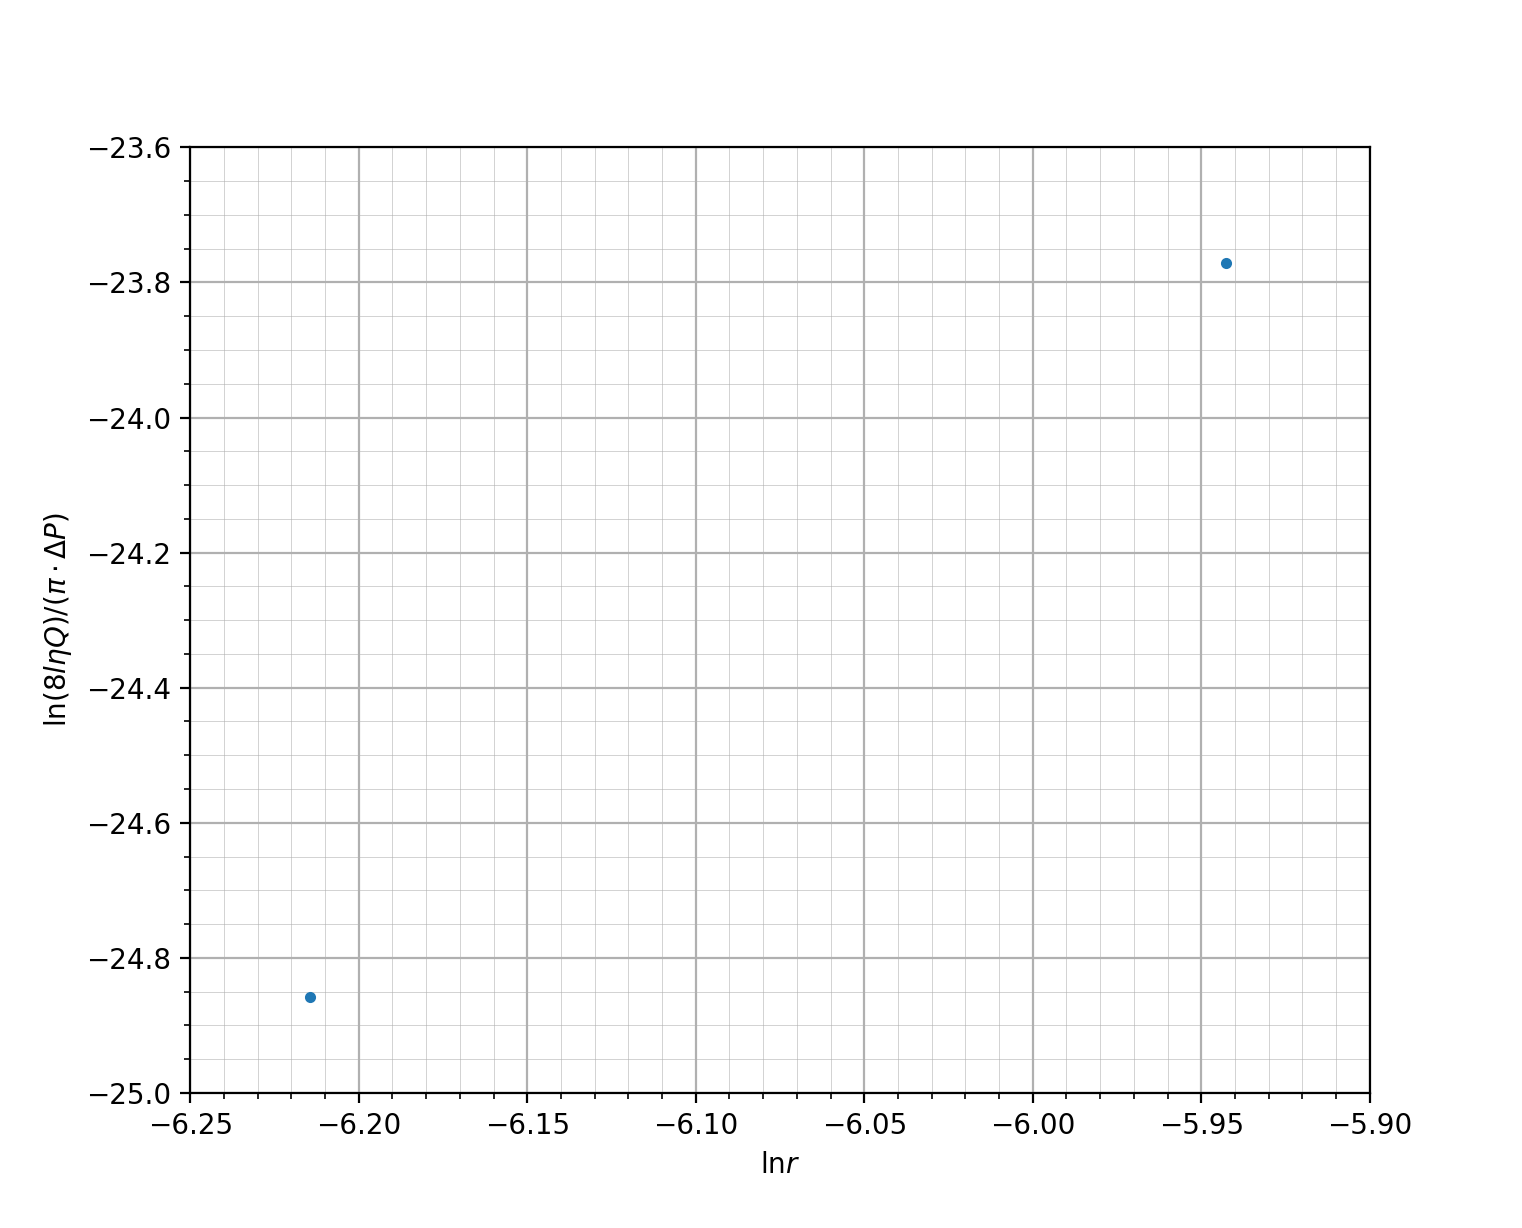

(array([-6.2146081 , -5.94267438]), array([-24.85843239, -23.77069753]))

In [9]:
xdata = np.log(np.array([r, r1]))
ydata = np.log(
    (8 * l * np.array([eta, eta1])) / (math.pi * np.array([eta_opt[0], eta1_opt[0]]))
)
create_plot('$\ln r$', '$\ln(8l\eta Q)/(\pi\cdot\Delta P)$')
plt.xlim(-6.25, -5.9)
plt.ylim(-25, -23.6)
plt.plot(xdata, ydata, linestyle='', marker='.')
xdata, ydata

In [10]:
n = (ydata[1] - ydata[0]) / (xdata[1] - xdata[0])
n

4.0

## Оценим ошибку $\eta$ и $n$

Относительная погрешность $\eta$
$$\varepsilon_\eta^2 = \varepsilon_Q^2 + \varepsilon_P^2 = \varepsilon_V^2 + \varepsilon_t^2 + \varepsilon_P^2.$$

In [11]:
sigma_v = .02e-3
sigma_t = .5
sigma_p = .2 * 9.8

eps_v = sigma_v / d1[1].mean()
eps_t = sigma_t / d1[0].mean()
eps_p = sigma_p / d1[2].mean()
print(eps_v, eps_t, eps_p)

eps_eta = math.sqrt(eps_v ** 2 + eps_t ** 2 + eps_p ** 2)
print(eps_eta)
sigma_eta = eps_eta * eta
print(sigma_eta)

0.0034999999999999996 0.0077151989419155746 0.008636644046884637
0.012098178173011134
2.6925645194185025e-07


Абсолютная погрешность $n$
$$\sigma_n^2 = \left(\frac{\partial n}{\partial\eta}\right)^2\sigma_\eta^2 + \left(\frac{\partial n}{\partial Q}\right)^2\sigma_Q^2 =$$
$$= \left(\frac{\sigma_\eta}{\eta\ln r}\right)^2 + \left(\frac{\sigma_Q}{Q\ln r}\right)^2 = \frac{\varepsilon_\eta^2 + \varepsilon_Q^2}{(\ln r)^2}$$

In [12]:
print(math.sqrt(eps_eta ** 2 + eps_v ** 2 + eps_t ** 2) / math.log(r) ** 2)

0.00038241979995381917
